In [5]:
from tensorflow import keras

In [6]:
#load CIFAR dataset.
(x_train,y_train),(x_test,y_test)=keras.datasets.cifar10.load_data()

In [7]:
#let's flatten and normalize for clustering
x_train=x_train.astype("float32")/255
x_train=x_train.reshape(-1,32*32*3)
y_train=y_train.flatten()

In [8]:
#now to reduce dimentionality we are using PCA now.
from sklearn.decomposition import PCA
pca=PCA(n_components=50)
x_pca=pca.fit_transform(x_train)

print("Original shape:",x_train.shape,"Reduced_shape",x_pca.shape)

Original shape: (50000, 3072) Reduced_shape (50000, 50)


In [10]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score,homogeneity_score

#now we can run kmeans with 10 clusters.
kmeans=KMeans(n_clusters=10,random_state=42)
y_kmeans=kmeans.fit_predict(x_pca)

# Evaluate clustering quality
print("KMeans ARI:", adjusted_rand_score(y_train, y_kmeans))
print("KMeans Homogeneity:", homogeneity_score(y_train, y_kmeans))

KMeans ARI: 0.042861930172845536
KMeans Homogeneity: 0.08131328130070516


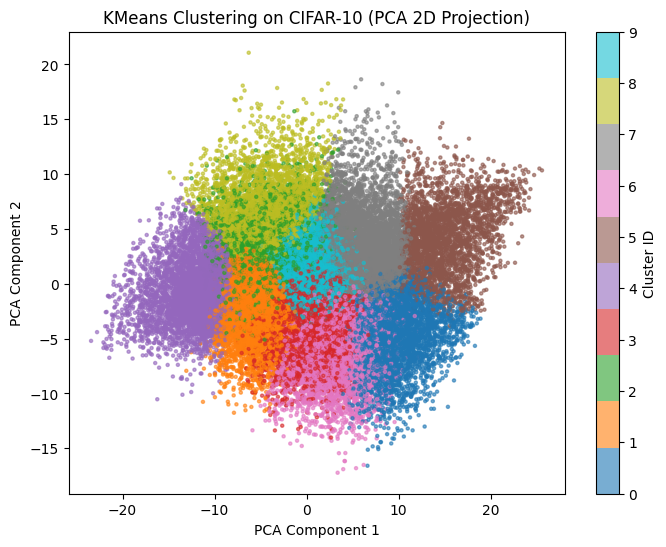

In [13]:
import matplotlib.pyplot as plt

# Reduce PCA to 2D for visualization
from sklearn.decomposition import PCA
x_pca_2d = PCA(n_components=2, random_state=42).fit_transform(x_pca)

# Scatter plot with cluster colors
plt.figure(figsize=(8,6))
plt.scatter(x_pca_2d[:,0], x_pca_2d[:,1], c=y_kmeans, cmap="tab10", s=5, alpha=0.6)
plt.title("KMeans Clustering on CIFAR-10 (PCA 2D Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster ID")
plt.show()